# Einfaches Neuronales Netz für Ziffernerkennung mit MNIST-Datensatz

Dies ist der Code mit Erklärungen, es wird erklärt, was der Code macht. Die Anmerkungen beziehen sich immer auf die Code-Zelle überbei.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zuerst werden die Python-Bibliotheken pandas, numpy und matplotlib importiert. Bibliotheken sind Erweiterungen zu den Funktionen, die Python schon kann. Pandas wird zur Darstellung, Verarbeitung und Analyse von Daten verwendet. Numpy wird zur Darstellung von Matrizen und zur Berechnung von Operationen auf diesen verwendet. Matplotlib wird zur Visualisierung verwendet. 

In [32]:
data=pd.read_csv("data/mnist_train.csv", header=None)

Als nächstes werden die Daten eingelesen und als "data" gespeichert. Dies geschieht mithilfe der Pandas-Bibliothek.

In [33]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Hier werden nur kurz die Daten in einer Tabelle dargestellt (die erste Zeile und Spalte sind nur zur Nummerierung dieser gedacht). Hier kann man  sehen, dass in der ersten Spalte die Ziffer (hier: erste Zeile: 5, zweite Zeile: 0, dritte Zeile: 4, usw.) stetht, die von den folgenden Zahlen/Helligkeitswerten zwischen 0 und 255 codiert wird (hier sieht man nur 0er). Diese Helligkeitswerte repräsentieren die einzelnen Pixel und deren Helligkeit.

In [34]:
data=np.array(data)

Nun werden die Daten in eine Matrix verpackt, um mit diesen Daten sehr einfach rechnen zu können.

In [35]:
zeilen, spalten=data.shape 
np.random.shuffle(data)

Es wird nur kurz ausgelesen, wie viele Zeilen und Spalten die Daten haben, um später mit diesen Werten zu rechnen. Anschließend werden die einzelnen Zeilen zufällig durchgemischt.

In [36]:
data_ueberpruefen=data[0:1000].T
label_ueb=data_ueberpruefen[0]
daten_ueb=data_ueberpruefen[1:spalten]

Nun wird der Datensatz in zwei Teile geteilt: einen Trainingsteil und einen Teil zur Überprüfung, wie gut das Netz funktioniert. Für data_ueberpruefen werden die ersten 1000 Zeilen vom Datensatz genommen. Diese werden transponiert, um jedes Beispiel in einer Spalte zu haben, um es wie in der ABA als Matrix mit einer Spalte auslesen zu können. Anschließend wird die erste Zeile, die Labels, in eine separate Matrix label_ueb gesteckt und die Daten, die die Bilder repräsentieren in die Matrix daten_ueb.

In [37]:
data_trainieren=data[1000:zeilen].T #Y label, X daten
label_train=data_trainieren[0]
daten_train=data_trainieren[1:spalten]
daten_train=daten_train/255
_,zeilen_train=daten_train.shape
print(zeilen_train)

59000


Das gleiche wird mit dem Trainingsdaten gemacht, wobei hier die Werte der Bilder durch 255 geteilt werden, um sie auf das Intervall [0;1] zu bringen, da ein neuronales Netz damit am besten rechnen kann. 

In [38]:
def matrizen_erstellen():
    w2=np.random.rand(16,784)-0.5
    b2=np.random.rand(16,1)-0.5
    w3=np.random.rand(16,16)-0.5
    b3=np.random.rand(16,1)-0.5
    w4=np.random.rand(10,16)-0.5
    b4=np.random.rand(10,1)-0.5
    return w2, b2, w3, b3, w4, b4

Nun wird eine Funktion definiert, die zufällige Matrizen erstellt. Funktionen in Python werden dazu genutzt, um Code öfters auszuführen, ohne ihn jedes Mal schreiben zu müssen. 
Bei matrizen_erstellen werden 6 zufällige Matrizen erstellt, die Werte zwischen -0,5 und +0,5 haben. Die Bezeichnung ist wie in der ABA, wobei w2 die Matrix W^(2) ist usw.

In [39]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

Hier wird die Sigmoid-Funktion definert, um sie später zu verwenden.

In [40]:
def Abfrage(w2,b2,w3,b3,w4,b4, eingabe):
    z2=w2.dot(eingabe)+b2
    a2=sigmoid(z2)
    z3=w3.dot(a2)+b3
    a3=sigmoid(z3)
    z4=w4.dot(a3)+b4
    a4=sigmoid(z4)
    return z2,a2,z3,a3,z4,a4


Als Abfrage wird die Vorwärtsrechnung des Netzes bezeichnet. Es wird, wie in der ABA bereits beschrieben, z2 berechnet durch W*X+B. Auf diese Art werden auch die nächsten Schichten berechnet und schließlich die Ausgabe a4. 

In [41]:
def eins_aus_n(eingabe):
    gewuenscht=np.zeros((eingabe.size, eingabe.max()+1))
    gewuenscht[np.arange(eingabe.size),eingabe]=1
    gewuenscht=gewuenscht.T
    return gewuenscht

eins_aus_n ist die Funktion, die den gewünschten Output in Matrixform ausgibt. Hierbei wird eine Spaltenmatrix erstellt, die ausschließlich Nullen enthält, außer bei der gewünschten Ausgabe, die stattdessen eine Eins enthält.

In [42]:
def ableitung_sigmoid(eingabe):
    return sigmoid(eingabe)*(1-sigmoid(eingabe))

Die Ableitung der Sigmoid-Funktion ist definiert als sigmoid*(1-sigmoid). Diese Funktion wird hier implementiert.

In [43]:
def backpropagation(z2,a2,z3,a3,w3,a4,w4, labels, daten): 
    dz4=a4-eins_aus_n(labels)
    dw4=1/zeilen*dz4.dot(a3.T)
    db4=1/zeilen*np.sum(dz4)
    dz3=w4.T.dot(dz4)*ableitung_sigmoid(z3)
    dw3=1/zeilen*dz3.dot(a2.T)
    db3=1/zeilen*np.sum(dz3)
    dz2=w3.T.dot(dz3)*ableitung_sigmoid(z2)
    dw2=1/zeilen*dz2.dot(daten.T)
    db2=1/zeilen*np.sum(dz2)
    return dw2,db2,dw3,db3,dw4,db4

Hier wird der Backpropagation-Algorithmus initialisiert. Hier wird Backpropagation ein wenig anders als in der ABA implementiert - er wird in einer einfach programmierbaren Form umgesetzt, die rechentechnisch einfacher zu implementieren ist. Zuerst wird die Änderung der letzten Schicht bestimmt, diese wird dann mit der Aktivierung aus der vorherigen Schicht multipliziert, um die Änderung der Gewichte für alle Trainingsbeispiele aufsummiert zu berechnen. Dies wird dann durch die Anzahl der Trainingsbeispiele dividiert. ### Der Bias ist in diesen Beispielen meist negativ.   
Um die Änderung der Aktivierung der vorherigen Schicht auszurechnen, werden die Gewichte transponiert und mit den Änderungen der Gewichte der aktuellen Schicht multipliziert (das Transponieren der Gewichte hat den Grund, dass bei der Vorwärtsrechnung die Größe der Matrix z4xz3 beträgt und deshalb muss beim Rückwärtsrechnen die Matrix transponiert werden, damit die Operation überhaupt ausgeführt werden kann). Dies wird mit der Ableitung der Aktivierungsfunktion der Schicht multiplizeirt, wodurch man die Änderungen der Schicht erhält, die ausgeführt werden sollen. 

In [44]:
def parameter_aktualisieren(w2,b2,w3,b3,w4,b4,dw2,db2,dw3,db3,dw4,db4,lernrate):
    w2=w2-lernrate*dw2
    b2=b2-lernrate*db2
    w3=w3-lernrate*dw3
    b3=b3-lernrate*db3
    w4=w4-lernrate*dw4
    b4=b4-lernrate*db4
    return w2,b2,w3,b3,w4,b4

In dieser Zelle werden die Gewichts- und Biasmatrizen aktualisiert. Die Lernrate ist hier essentiell, um nicht über das Minimum hinüberzusteigen.

In [45]:
def vorhersage_machen(a4):
    return np.argmax(a4,0)

Die Funktion vorhersage_machen gibt den Index des Maximums aus jeder Spalte zurück, das ist die Ziffer, von der das Netz denkt, dass es sie ist. 

In [46]:
def wie_akkurat(vorhersage, label):
    print(vorhersage, label)
    return np.sum(vorhersage==label)/label.size

wie_akkurat gibt die Vorhersage und das wirkliche Label einer Ziffer aus, außerdem summiert es auf, wie oft die Vorhersage gleich dem Label ist und dividiert das duch die Anzahl der Label und sagt damit aus, wie genau das Netz klassifiziert hat.

In [47]:
def gradientenabstieg(daten,label,wiederholungen,lernrate):
    w2,b2,w3,b3,w4,b4=matrizen_erstellen()
    for i in range(wiederholungen):
        z2,a2,z3,a3,z4,a4=Abfrage(w2,b2,w3,b3,w4,b4, daten)
        dw2,db2,dw3,db3,dw4,db4=backpropagation(z2,a2,z3,a3,w3,a4,w4,label,daten)
        w2,b2,w3,b3,w4,b4=parameter_aktualisieren(w2,b2,w3,b3,w4,b4,dw2,db2,dw3,db3,dw4,db4,lernrate)
        if i%50==0:
            print("Wiederholungen: ",i)
            print("Accuracy: ", wie_akkurat(vorhersage_machen(a4),label))
    return w2,b2,w3,b3,w4,b4

Die Funktion gradientenabstieg ist das Herz des gesamten Projekts. Es erstellt zuerst mittels der Funktion matrizen_erstellen die Matrizen und wiederholt so oft, wie man eingibt folgendes: es rechnet zuerst das Netz vorwärts aus, wendet dann Backpropagation an, um den Fehler und die neuen Gewichte auszurechnen und aktualisiert die Gewichtsmatrizen anschließend. Außerdem gibt sie alle 50 Wiederholungen aus, wie akkurat das Netz ist. 

In [48]:
w2, b2, w3, b3, w4, b4=gradientenabstieg(daten_train,label_train, 1000, 0.1)

Wiederholungen:  0
[3 3 3 ... 3 3 3] [2 1 2 ... 9 1 3]
Accuracy:  0.1021864406779661
Wiederholungen:  50
[1 0 2 ... 7 1 7] [2 1 2 ... 9 1 3]
Accuracy:  0.189135593220339
Wiederholungen:  100
[1 1 1 ... 7 1 7] [2 1 2 ... 9 1 3]
Accuracy:  0.2349322033898305
Wiederholungen:  150
[1 1 1 ... 7 1 7] [2 1 2 ... 9 1 3]
Accuracy:  0.2818135593220339
Wiederholungen:  200
[1 1 1 ... 7 1 7] [2 1 2 ... 9 1 3]
Accuracy:  0.32261016949152543
Wiederholungen:  250
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.3536101694915254
Wiederholungen:  300
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.37471186440677967
Wiederholungen:  350
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.39101694915254237
Wiederholungen:  400
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.40772881355932206
Wiederholungen:  450
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.42698305084745763
Wiederholungen:  500
[1 1 1 ... 7 1 0] [2 1 2 ... 9 1 3]
Accuracy:  0.4474406779661017
Wiederholungen:  550
[1 1 1 ... 4 1 0] [2 

Hier wird dann der Gradientenabstieg ausgeführt. Hier kann die Lernrate und die Anzahl der Wiederholungen eingestellt werden. Mit diesen beiden Variablen kann beliebig herumgespielt werden und experimentiert werden, wie diese auf auf die Genauigkeit beim Trainingsdatensatz und Testdatensatz wirken.

In [49]:
def make_predictions(X, w2, b2, w3, b3, w4, b4):
    _, _, _, _, _, a3 = Abfrage(w2, b2, w3, b3, w4, b4, X)
    predictions = vorhersage_machen(a3)
    return predictions

Diese Funktion rechnet das Netz vorwärts und gibt für jeden Input die Ziffer aus, von der das Netz denkt, dass es sich beim Input um sie handelt.

In [50]:
def test_vorhersage(index, w2, b2, w3, b3, w4, b4):
    current_image = daten_train[:, index, None]
    prediction = make_predictions(daten_train[:, index, None], w2, b2, w3, b3, w4, b4)
    label = label_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Diese Funktion gibt zuerst die Ziffer aus, von der das Netz denkt, dass sie auf dem Bild zusehen ist. Danach gibt sie das Label des Bildes aus und zeigt zum Schluss das Bild der Ziffer.

Prediction:  [9]
Label:  9


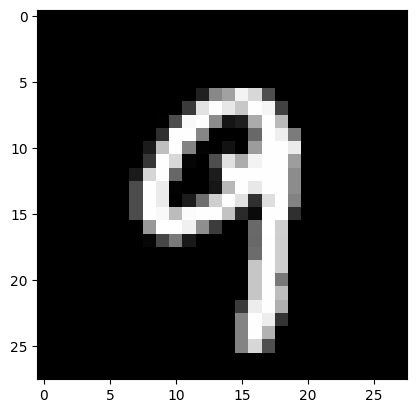

In [51]:
test_vorhersage(115, w2, b2, w3, b3, w4, b4)

Hier wird das Netz befragt, was die Ziffer in der 115. Spalte ist.

In [52]:
dev_predictions = make_predictions(daten_ueb, w2, b2, w3, b3, w4, b4)
wie_akkurat(dev_predictions, label_ueb)

[1 1 6 6 9 4 7 6 0 6 0 1 0 3 2 1 3 4 0 1 6 5 3 6 0 4 7 3 6 9 1 3 1 2 1 4 6
 6 4 7 3 6 3 2 7 3 3 2 9 4 7 6 1 2 6 4 3 0 4 3 4 7 8 7 0 7 7 5 4 2 6 0 2 7
 7 4 7 2 2 5 1 7 7 6 0 7 1 4 4 2 3 9 1 7 6 7 0 2 7 3 1 1 7 6 9 0 1 1 6 1 2
 1 5 7 1 0 3 3 2 7 4 7 7 7 1 1 2 4 4 1 4 2 6 7 3 0 0 3 3 1 3 3 7 6 3 3 0 2
 0 7 6 7 7 2 1 7 3 0 0 0 7 7 6 0 4 6 0 1 0 7 2 1 0 3 0 5 6 0 3 4 7 6 7 0 5
 1 0 3 2 1 2 4 4 3 0 6 3 9 8 6 7 3 4 0 0 2 2 1 6 6 4 4 7 4 7 1 1 1 6 7 3 6
 1 4 0 6 3 7 0 6 4 4 4 3 1 1 7 2 7 6 7 6 2 1 4 7 7 4 0 1 0 7 0 1 2 1 5 4 7
 3 4 4 0 9 3 0 1 4 7 4 6 0 4 1 2 7 7 6 0 2 7 7 8 2 2 8 1 1 7 1 7 7 1 7 4 7
 2 2 1 1 0 3 0 0 7 4 6 4 4 2 6 4 2 1 0 2 0 3 2 0 2 3 6 2 4 9 3 6 0 9 7 1 1
 3 7 9 1 1 7 7 7 3 8 0 4 2 3 1 1 7 9 9 6 7 7 4 0 1 7 0 4 0 1 9 7 1 6 7 1 6
 1 4 0 9 2 7 0 0 4 2 1 7 2 7 3 4 4 2 2 4 2 1 4 7 0 6 3 3 2 0 9 0 0 4 2 3 1
 6 4 3 2 3 4 4 1 1 1 0 7 1 7 2 4 6 9 0 7 3 0 7 0 7 7 2 9 2 3 7 7 3 0 3 7 3
 3 3 0 0 7 7 9 0 1 9 2 6 6 2 0 2 1 3 8 2 1 0 3 6 1 1 4 4 4 7 9 4 1 6 2 7 9
 7 5 7 6 7 7 2 2 6 4 6 4 

  return 1/(1+np.exp(-input))


np.float64(0.598)

Zum Schluss wird das Netz auf die Testdaten angewandt und überprüft, wie gut es auf diesen performt. Wenn die Genauigkeit auf dem Trainings- und Testdatensatz etwa gleich ist (meist ist sie beim Trainingsdatensatz etwas höher), dann hat das Netz sehr gut gelernt, wie es Ziffern klassifiziert. Wenn diese Genauigkeiten aber weit auseinander liegen, dann hat das Netz lediglich die Trainingsdaten auswendig gelernt und kann keine Muster erkennen.

# Quellen
ln[1]:  
https://numpy.org/ [Zugriff: 01.02.2026]  
https://pandas.pydata.org/about/ [Zugriff: 01.02.2026]  
https://matplotlib.org/ [Zugriff: 01.02.2026]  

ln[5]:  
https://numpy.org/doc/2.1/reference/random/generated/numpy.random.shuffle.html [Zugriff : 01.02.2026]

ln[16]:  
https://www.datacamp.com/doc/numpy/argmax [Zugriff: 01.02.2026]